## Goals
1. What are the most important features for predicting X as a target variable?
2. Which classification approach do you prefer for the prediction of X as a target variable, and why?
3. Why is dimensionality reduction important in machine learning?

## Understanding data variables
### Content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1. sex: 1 for female and 2 for male.
2. age: of the patient.
3. classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
   degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. pneumonia: whether the patient already have air sacs inflammation or not.
6. pregnancy: whether the patient is pregnant or not.
7. diabetes: whether the patient has diabetes or not.
8. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. asthma: whether the patient has asthma or not.
10. inmsupr: whether the patient is immunosuppressed or not.
11. hypertension: whether the patient has hypertension or not.
12. cardiovascular: whether the patient has heart or blood vessels related disease.
13. renal chronic: whether the patient has chronic renal disease or not.
14. other disease: whether the patient has other disease or not.
15. obesity: whether the patient is obese or not.
16. tobacco: whether the patient is a tobacco user.
17. usmr: Indicates whether the patient treated medical units of the first, second or third level.
18. medical unit: type of institution of the National Health System that provided the care.
19. intubed: whether the patient was connected to the ventilator.
20. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
21. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.


## Reading covid dataset to pandas dataframe

In [1]:
import pandas as pd # Helps to work with pandas dataframe
import seaborn as sns # Help with visualisation 
import matplotlib.pyplot as plt # Helps with visualization
import numpy as np # Helps to work with numbers and arrithmetic operation
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
pd.set_option('display.max_columns', None) #This helps to display the entire column in df
#pd.set_option('display.max_rows', None)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


## Early data analysis 
Exploring the nature or dataset

In [4]:
df.shape
# There are 21 features and 1,048,575 rows

(1048575, 21)

In [5]:
df.duplicated().sum()

812049

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

### Null values
Though the 'isnull()'method had returned no null values, The dataset litrature however stated that values such as 97, 98, 99.. are used to fill null values and should be treated as null values. 

To progress, we will count the values in each variable to look for this null values.

In [8]:
df['PREGNANT'].unique()
# The pregnant hase this values "97" and "98"

array([ 2, 97, 98,  1], dtype=int64)

In [9]:
# Now let's count how many of this null values we have in 'pregnant'
df['PREGNANT'].value_counts()
# As shown there are 527265 null values in the pregnant variables

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [10]:
no=[523511,513179,8131,3754]
w= sum(no)
print(w)

1048575


According to logic, only biological females can get pregnant, and the data literature did not tell us otherwise, so to be able to handle the propotion of non pregant patient, we would value count the gender column and see the number of females and males in them

In [11]:
# 1: Female and 2: Male
df['SEX'].unique()

array([1, 2], dtype=int64)

In [12]:
df['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [13]:
# So according to results there are 523511 male, which is the same null value represented with 97, we would replace 97 with 2
df['PREGNANT'].replace(98,1,inplace=True)
df['PREGNANT'].replace(97,2,inplace=True) # inplace means replace in the main df

In [14]:
df['PREGNANT'].value_counts()
#2: Non pregnant. This value contain all male patient, and women that were not pregnant too. 
#1: Pregant. This are the assumed pregnant women. 

2    1036690
1      11885
Name: PREGNANT, dtype: int64

In [15]:
df['USMER'].value_counts()
# No null values in Usmer

2    662903
1    385672
Name: USMER, dtype: int64

In [16]:
df['MEDICAL_UNIT'].value_counts()
#No null values in the 'medical unit'

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

In [17]:
df['PATIENT_TYPE'].value_counts()
#No null values in the patient type

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [18]:
df['DATE_DIED'].value_counts()
# 9999-99-99: Represent patients that did not die
# All other dates represents patient that died
# Since this can be categoried into 2 classes, died:1 did not die:2

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [19]:
# Died= df['DATE_DIED'].value_counts()
def get_die(value):
    if (value=='9999-99-99'):
        return 2
    else:
        return 1

In [20]:
df['Died']= df['DATE_DIED'].apply(get_die)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97,1


In [21]:
df['Died'].unique()
#1: Died
#2: Survided

array([1, 2], dtype=int64)

In [22]:
# Lets count the values in the died column to make sure we got all unique values accounted for
df['Died'].value_counts()
# Now a new column Died as been added to df where 1:Died, 2: Did not die 

2    971633
1     76942
Name: Died, dtype: int64

In [23]:
# Droping he date_died column
df.drop(['DATE_DIED'], axis=1, inplace=True)

In [24]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97,1


## Exploratory data analysis
### checking for outliers in the age column 
We are doing this to be able to see the highest age and the lowest age of patient

Text(0.5, 1.0, 'AGE')

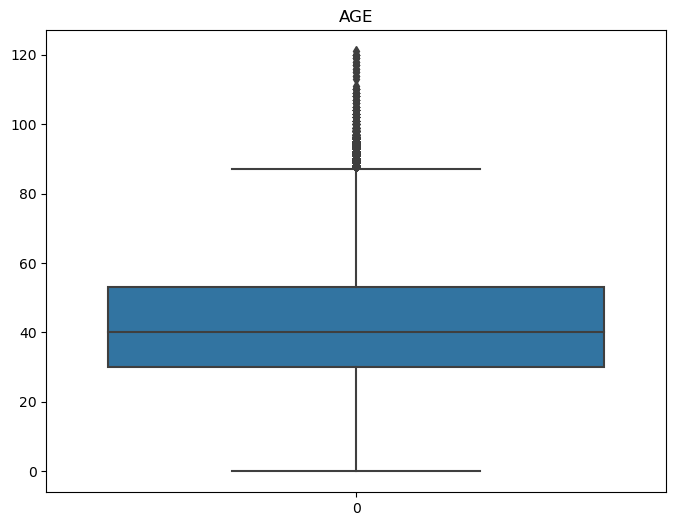

In [25]:
# looking for outliers use bok plot 
plt.figure(figsize=(8,6)) 
sns.boxplot(data=df["AGE"]) # This code utilises seaborn to plot a box plot of credit_score 
plt.title("AGE")# This defines the title of the boxplot 

In [26]:
df["AGE"].describe()

count    1.048575e+06
mean     4.179410e+01
std      1.690739e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      5.300000e+01
max      1.210000e+02
Name: AGE, dtype: float64

In [27]:
perc_0= (df[df['AGE']==0].shape[0]/df.shape[0])*100
perc_0

0.36830937224328253

As shown in the boxplot, majority of the patient are between age 0 and aproximately 95 years old, with some outliers above 100. However, based on domain knowledge, covid 19 had been reported to have more fatal effect on old patient conpared to younger pateint so we believe this outliers are significant so we will keep them. Paient that are 0 years seems unrealistic but they could be babies that are less than a year old, so we would consider them significant too so we will keep them, and according to percentahe estimation, they make up for over 19% of the total age population. 

## Grouping patient age
1.    0:childrens
2.    1:adult
3.    2:old
4.    3:Senior's

In [28]:
def Age_cat(x):
    if(x<=15):
        return 0
    elif(x<=30):
        return 1
    elif(x<=60):
        return 2
    else:
        return 3
df['AGE_Cat']=df['AGE'].apply(Age_cat)

In [29]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1,3
1,2,1,2,1,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97,1,3
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1,2
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1,2
4,2,1,2,1,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97,1,3


In [30]:
df['AGE_Cat'].unique()
#0:childrens
#1:adult
#2:old
#3:Senior's

array([3, 2, 1, 0], dtype=int64)

In [31]:
df.drop(['AGE'], axis=1,inplace=True)

In [32]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat
0,2,1,1,1,97,1,2,2,2,2,2,1,2,2,2,2,2,3,97,1,3
1,2,1,2,1,97,1,2,2,2,2,2,1,2,2,1,1,2,5,97,1,3
2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,3,2,1,2
3,2,1,1,1,97,2,2,2,2,2,2,2,2,2,2,2,2,7,97,1,2
4,2,1,2,1,97,2,2,1,2,2,2,1,2,2,2,2,2,3,97,1,3


In [33]:
df['Died'].unique()
#1: Died
#2: Survided

array([1, 2], dtype=int64)

Text(0, 0.5, 'count')

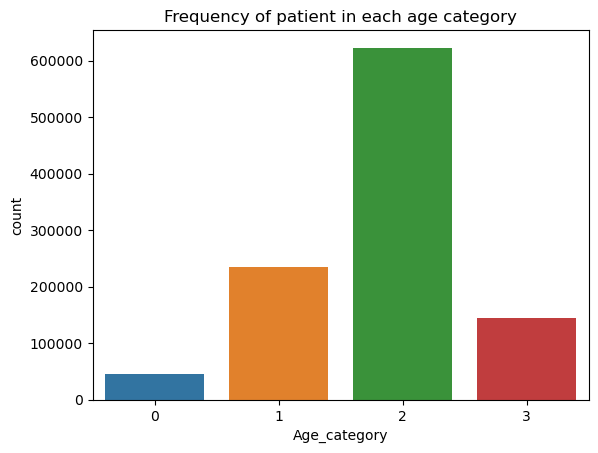

In [34]:
sns.countplot(x='AGE_Cat', data=df)
plt.title('Frequency of patient in each age category')
plt.xlabel('Age_category')
plt.ylabel('count')

In [35]:
df['AGE_Cat'].value_counts()

2    623016
1    235198
3    144372
0     45989
Name: AGE_Cat, dtype: int64

The above plot counts the number of patients in each age category. We plotted this to see the proportion of covid_19 patient's in each age category. Also to see which age group recorded the highest counts of covid_19. 
As shown in the plot, age categories 2 which are the patients that are between age (30-60) years old have the highest counts, followed by patients in the 3 category which are the patients that are between age (60-120) years old, followed by patients in the 1 category which are the patients that are between age (15-30) years old. The children, age (0-15) years old, have the lowest count. 

Text(0, 0.5, 'count')

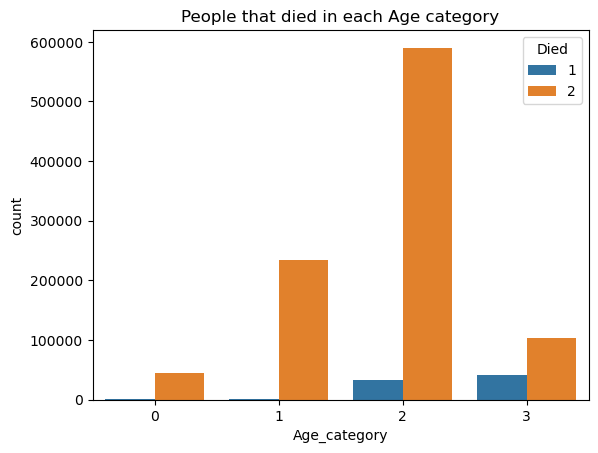

In [36]:
sns.countplot(x='AGE_Cat', data=df, hue= 'Died')

plt.title('People that died in each Age category')
plt.xlabel('Age_category')
plt.ylabel('count')

To further explore the age category and compare to the proportion of patients that died and survied in each category. This plot above shows that there are more death that survival in the senior patients than other age groups. Furthermore, though the count plot show that the old age categories recorded the highest number of covid_19 cases, they number of survival in this age group is higher that those that died in the age group.

Text(0, 0.5, 'frequency')

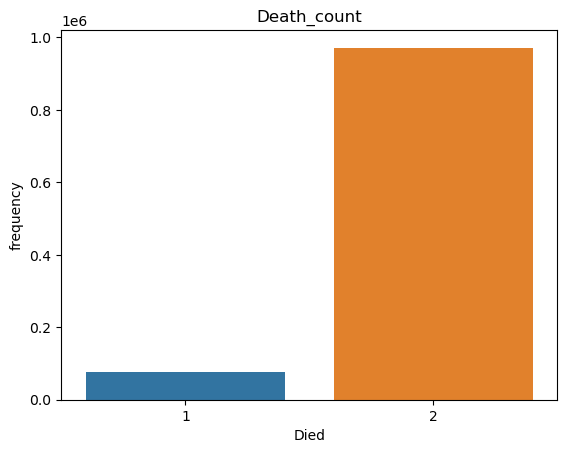

In [37]:
sns.countplot(x=df['Died'])
plt.title('Death_count')
plt.xlabel("Died")
plt.ylabel("frequency")

In [38]:
df['Died'].value_counts()

2    971633
1     76942
Name: Died, dtype: int64

In [39]:
survided= len(list(filter(lambda x: x==2, df['Died'])))
survided

971633

In [40]:
died= len(list(filter(lambda x: x==1, df['Died'])))
died

76942

In [41]:
survided+died

1048575

In [42]:
n=len(df['Died'])
percent_of_Survied = (survided/n)*100
percent_of_died = (died/n)*100
print("Survival percentage:{:.2f}%".format (percent_of_Survied))
print("Death percentage:{:.2f}%".format (percent_of_died))

Survival percentage:92.66%
Death percentage:7.34%


overall, significantly more patient survided covid_19 in df than those that died. Percentage calculation shows that 92.66% of overall patient survided and only 7.34% died

## Handling missing values
To be able to veiw all the null values at the same time, we will explicitly ask pandas to treat the 97, 99, 98 values as null values

In [43]:
# This code explicitly tell pandas to replace the 97, 98, 99 values as NAN/missing values
feauture=["INTUBED","PNEUMONIA","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","ICU"]
for variable in feauture: 
    df[variable]=df[variable].replace([98,97,99],np.nan)

In [44]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat
0,2,1,1,1,NaN,1.0,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,3
1,2,1,2,1,NaN,1.0,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1,3
2,2,1,2,2,1.0,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,2
3,2,1,1,1,NaN,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,2
4,2,1,2,1,NaN,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,3


In [45]:
#Now we are bale to get the missing values
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
PREGNANT                     0
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
Died                         0
AGE_Cat                      0
dtype: int64

In [46]:
df.CLASIFFICATION_FINAL.unique()

array([3, 5, 7, 6, 1, 2, 4], dtype=int64)

In [47]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [48]:
# This code explicitly tell pandas to replace the 4, 5, 6 and 7 values as NAN/missing values
# We are performing these replacements due that we only want the data from covid patients

classifi =  ['CLASIFFICATION_FINAL']

for variable in classifi: 
    df[variable]=df[variable].replace([4,5,6,7],np.nan)

## Percentage of missing values / Column


In [49]:
df.isnull().mean()*100 # Porcentage of missing data

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
PREGNANT                 0.000000
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL    62.617934
ICU                     81.637651
Died                     0.000000
AGE_Cat                  0.000000
dtype: float64

In [50]:
# Since we have 2 columns with more than 81% of missing data, we will proceed to remove them 
df.drop(["INTUBED","ICU"],axis=1, inplace=True)

In [51]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'Died', 'AGE_Cat'],
      dtype='object')

In [52]:
df.shape

(1048575, 19)

In [53]:
# Due to the size of our data set and the porcentage of missing values been nearly 0, we will continue with removing
# every row that has a missing value

df.dropna(inplace = True)

In [54]:
df.isnull().mean()*100 # Porcentage of missing data

USMER                   0.0
MEDICAL_UNIT            0.0
SEX                     0.0
PATIENT_TYPE            0.0
PNEUMONIA               0.0
PREGNANT                0.0
DIABETES                0.0
COPD                    0.0
ASTHMA                  0.0
INMSUPR                 0.0
HIPERTENSION            0.0
OTHER_DISEASE           0.0
CARDIOVASCULAR          0.0
OBESITY                 0.0
RENAL_CHRONIC           0.0
TOBACCO                 0.0
CLASIFFICATION_FINAL    0.0
Died                    0.0
AGE_Cat                 0.0
dtype: float64

In [55]:
df.shape

(388878, 19)

In [56]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Died,AGE_Cat
0,2,1,1,1,1.0,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1,3
2,2,1,2,2,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1,2
4,2,1,2,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1,3
5,2,1,1,2,1.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2,2
6,2,1,1,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2,3


In [57]:
df['CLASIFFICATION_FINAL'].unique()

array([3., 1., 2.])

In [58]:
df.dtypes # Check our data types

USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
PNEUMONIA               float64
PREGNANT                  int64
DIABETES                float64
COPD                    float64
ASTHMA                  float64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL    float64
Died                      int64
AGE_Cat                   int64
dtype: object

In [59]:
# Since our features are categorical, we will assign them as integers
df['PNEUMONIA'] = df['PNEUMONIA'].astype(int)
df['DIABETES'] = df['DIABETES'].astype(int)
df['COPD'] = df['COPD'].astype(int)
df['ASTHMA'] = df['ASTHMA'].astype(int)
df['INMSUPR'] = df['INMSUPR'].astype(int)
df['HIPERTENSION'] = df['HIPERTENSION'].astype(int)
df['OTHER_DISEASE'] = df['OTHER_DISEASE'].astype(int)
df['CARDIOVASCULAR'] = df['CARDIOVASCULAR'].astype(int)
df['OBESITY'] = df['OBESITY'].astype(int)
df['RENAL_CHRONIC'] = df['RENAL_CHRONIC'].astype(int)
df['TOBACCO'] = df['TOBACCO'].astype(int)
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].astype(int)

In [60]:
df.dtypes

USMER                   int64
MEDICAL_UNIT            int64
SEX                     int64
PATIENT_TYPE            int64
PNEUMONIA               int32
PREGNANT                int64
DIABETES                int32
COPD                    int32
ASTHMA                  int32
INMSUPR                 int32
HIPERTENSION            int32
OTHER_DISEASE           int32
CARDIOVASCULAR          int32
OBESITY                 int32
RENAL_CHRONIC           int32
TOBACCO                 int32
CLASIFFICATION_FINAL    int32
Died                    int64
AGE_Cat                 int64
dtype: object

## Random forest

In [61]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [62]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Died,AGE_Cat
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,3,1,3
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,3,1,2
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,3,1,3
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,2,3


In [63]:
DF = df.drop(["Died"], axis=1, inplace=False)

In [64]:
DF.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AGE_Cat
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,3,3
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,3,2
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,3,3
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3


In [65]:
# Splitting our target feature

X = DF  # Features independent variable
y = df['Died']  # Label of dependent variable (target variable)

In [66]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state = 11) # 80% training and 20% test

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((388878, 18), (388878,), (311102, 18), (77776, 18), (311102,), (77776,))

In [67]:
# Execute Random Forest

ramF = RandomForestClassifier(n_estimators = 50, max_depth = 3)

#Train the model using the training sets y_pred=clf.predict(X_test)
ramF.fit(X_train, y_train)

y_pred = ramF.predict(X_test)

## Model Evaluation

In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.8788829458959062
Precision: 0.6823828345567476
Accuracy: 0.88
Precision: 0.68


n_estimators = 100


1. Test_size = 40%
Accuracy: 0.8916889528903518
Precision: 0.6204328726025929
Accuracy: 0.89
Precision: 0.62
2. Test_size = 30%
Accuracy: 0.892323253102928
Precision: 0.624457622215794
Accuracy: 0.89
Precision: 0.62
3. Test_size = 20%
Accuracy: 0.893257560172804
Precision: 0.6302702702702703
Accuracy: 0.89
Precision: 0.63
4. Test_size = 10%
Accuracy: 0.8933861345402181
Precision: 0.6363438520130577
Accuracy: 0.89
Precision: 0.64


n_estimators = 150

1. Test_size = 40%
Accuracy: 0.8918303846945073
Precision: 0.621009213627598
Accuracy: 0.89
Precision: 0.62
2. Test_size = 30%
Accuracy: 0.8922203936089967
Precision: 0.6243294185877918
Accuracy: 0.89
Precision: 0.62
3. Test_size = 20%
Accuracy: 0.8928461221970788
Precision: 0.6307167985927881
Accuracy: 0.89
Precision: 0.63
4. Test_size = 10%
Accuracy: 0.8936689981485291
Precision: 0.6384143670608848
Accuracy: 0.89
Precision: 0.64


After trying multiple sizes of splitting for train - test our model, we added the max_depth parameter which helped us improve the precision in our model, here are de results:

Following our tests of different number of estimators (decision trees), we found that the best number of decision trees
for our Random Forest model is 50 with a max_depth of 3.

n_estimators = 50


1. Test_size = 40%
Accuracy: 0.8823994548446822
Precision: 0.6933215055126093
Accuracy: 0.88
Precision: 0.69
2. Test_size = 30%
Accuracy: 0.8758485908249332
Precision: 0.7098288238542242
Accuracy: 0.88
Precision: 0.71
3. Test_size = 20%
Accuracy: 0.8693427278337791
Precision: 0.7330508474576272
Accuracy: 0.87
Precision: 0.73
4. Test_size = 10%
Accuracy: 0.8729942398683398
Precision: 0.7313883299798792
Accuracy: 0.87
Precision: 0.73

              precision    recall  f1-score   support

           1       0.68      0.23      0.34     10712
           2       0.89      0.98      0.93     67064

    accuracy                           0.88     77776
   macro avg       0.79      0.60      0.64     77776
weighted avg       0.86      0.88      0.85     77776



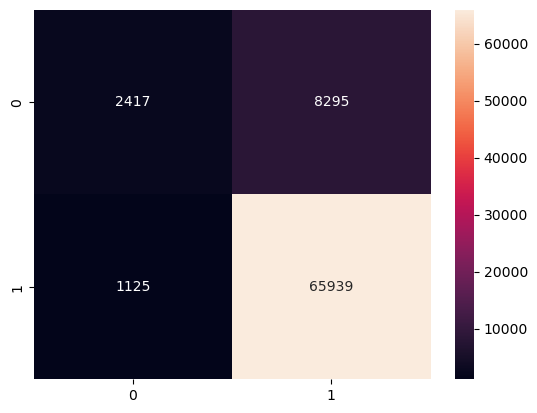

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = ramF.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

1. Test_size = 40%
 Accuracy = 0.88, F1 score = 0.28 and 0.93
2. Test_size = 30%
 Accuracy = 0.87, F1 score = 0.19 and 0.93
3. Test_size = 20%
 Accuracy = 0.87, F1 score = 0.25 and 0.93
4. Test_size = 10%
 Accuracy = 0.88, F1 score = 0.40 and 0.94

In [70]:
from sklearn.model_selection import cross_val_score


# Calculate the score using cross validation method
cross_val_score(ramF, X, y, scoring = 'accuracy', cv = 5).mean()

0.8667088219985875

After testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Random Forest model has an Accuracy between 86% - 88% in regards to if a person died or not due Covid-19.

## Gaussian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state = 11) # 80% training and 20% test

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((388878, 18), (388878,), (311102, 18), (77776, 18), (311102,), (77776,))

In [73]:
# Training
classi = GaussianNB()
classi.fit(X_train, y_train)

GaussianNB()

In [74]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:15,:]

array([[2, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [1, 1],
       [2, 2]], dtype=int64)

## Model Evaluation

In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.848269389014606
Precision: 0.46786662732369433
Accuracy: 0.85
Precision: 0.47


1. Test_size = 40%
Accuracy: 0.8472536515120346
Precision: 0.4645519103233758
Accuracy: 0.85
Precision: 0.46
2. Test_size = 30%
Accuracy: 0.8469450730302407
Precision: 0.463728946337642
Accuracy: 0.85
Precision: 0.46
3. Test_size = 20%
Accuracy: 0.848269389014606
Precision: 0.46786662732369433
Accuracy: 0.85
Precision: 0.47
4. Test_size = 10%
Accuracy: 0.8488479736679696
Precision: 0.4717203920179478
Accuracy: 0.85
Precision: 0.47

              precision    recall  f1-score   support

           1       0.47      0.74      0.57     10712
           2       0.95      0.87      0.91     67064

    accuracy                           0.85     77776
   macro avg       0.71      0.80      0.74     77776
weighted avg       0.89      0.85      0.86     77776



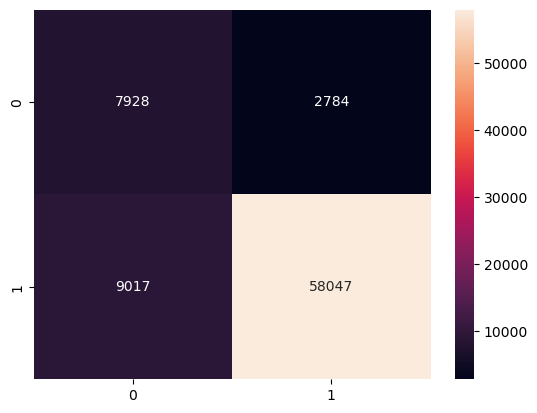

In [76]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

1. Test_size = 40% Accuracy = 0.85, F1 score = 0.57 and 0.91
2. Test_size = 30% Accuracy = 0.85, F1 score = 0.57 and 0.91
3. Test_size = 20% Accuracy = 0.85, F1 score = 0.57 and 0.91
4. Test_size = 10% Accuracy = 0.85, F1 score = 0.58 and 0.91

In [77]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 5).mean()

0.8281109162588821

After testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Gaussian Naive Bayes model has an Accuracy between 82% - 85% in regards to if a person died or not due Covid-19.

#### Manipulating the data. 
The accuracy of our random forest and gussian navie bayes models accuracies are average of 0.89%, and the presicions are an average of 0.55%. The surpport vector machine model was struggling coundn't train the dataset.
Our independent variables were not scaled 
So try to fix this we wold do the following:
1. Drop the classification_final
2. Scale the independent variables
3. Balance the data


In [78]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Died,AGE_Cat
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,3,1,3
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,3,1,2
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,3,1,3
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,2,3


In [79]:
df['CLASIFFICATION_FINAL'].unique()

array([3, 1, 2])

In [80]:
df2= df.drop(["CLASIFFICATION_FINAL"],axis=1, inplace=False)
df2.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Died,AGE_Cat
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,1,3
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,1,3
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3


In [81]:
#df2.isnull().sum()

In [82]:
df2["Died"].unique()
#1: died
#2: Survied

array([1, 2], dtype=int64)

In [83]:
df2["AGE_Cat"].unique()

array([3, 2, 1, 0], dtype=int64)

In [84]:
# Died= df['DATE_DIED'].value_counts()
def get_Die(value):
    if (value==2):
        return 0
    else:
        return 1
df2['DIED']= df2['Died'].apply(get_Die)
df2.head()
#0: survided
#1: Died 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Died,AGE_Cat,DIED
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,1,3,1
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,1
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,1,3,1
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,0
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,0


In [85]:
df2.drop(["Died"], axis=1, inplace=True)
df2.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE_Cat,DIED
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,3,1
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,3,1
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,0
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,0


In [86]:
df2.shape

(388878, 18)

The classification_final column has been dropped because we believe it is introducing noise to the data. The classification final has 3 unique value [1,2,3] that means the same thing, patient tested positive for covid19. In earlier implementation, the values 4 above have be explicitly called NAN and dropped since we are only intrested in patients that have covid_19 and using that to predict if the patient died from covid or not. Since the dropna function was used to drop all rows with patient that are classified as neg to covid_19 after calling them NAN. We assume based on how dropna funtion works, that df now contains only patients that has covid 19. The target values were changed to 0 and 1. O's are patients that survied covid 19 and 1 are patients that died. With this changes, we will retry our models to see how they performe.

### Random forest df2

In [87]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [88]:
X= df2.drop(["DIED"], axis=1, inplace=False)
y= df2["DIED"]

In [89]:
X.shape, y.shape

((388878, 17), (388878,))

In [90]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.20, random_state=11)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((311102, 17), (77776, 17), (311102,), (77776,))

In [91]:
rfc= RandomForestClassifier(n_estimators= 50, max_depth = 3)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

## Model Evaluation

In [92]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.8827016046081053
Precision: 0.6823502409915079
Accuracy: 0.88
Precision: 0.68


n_estimators = 50

1. Test_size = 40%
Accuracy: 0.8804965542069533
Precision: 0.6794788273615635
Accuracy: 0.88
Precision: 0.68
2. Test_size = 30%
Accuracy: 0.8817287252280052
Precision: 0.6859406608226568
Accuracy: 0.88
Precision: 0.69
3. Test_size = 20%
Accuracy: 0.8811201398889118
Precision: 0.7061304836895388
Accuracy: 0.88
Precision: 0.71
4. Test_size = 10% 
Accuracy: 0.8806315572927381
Precision: 0.6843643448611788
Accuracy: 0.88
Precision: 0.68

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     67064
           1       0.68      0.28      0.39     10712

    accuracy                           0.88     77776
   macro avg       0.79      0.63      0.66     77776
weighted avg       0.87      0.88      0.86     77776



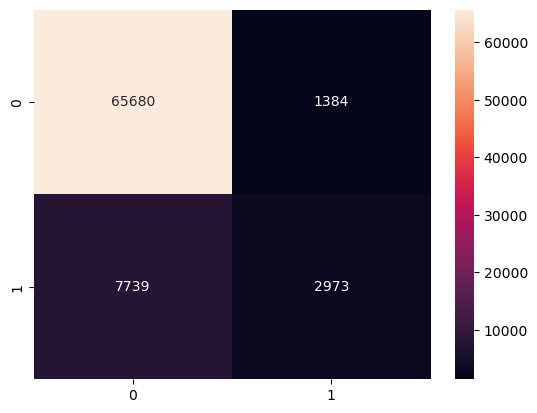

In [93]:
y_predict = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

1. Test_size = 40% Accuracy = 0.88, F1 score = 0.93 and 0.29
2. Test_size = 30% Accuracy = 0.87, F1 score = 0.93 and 0.24
3. Test_size = 20% Accuracy = 0.88, F1 score = 0.93 and 0.37
4. Test_size = 10% Accuracy = 0.88, F1 score = 0.93 and 0.38

In [94]:
# Calculate the score using cross validation method
cross_val_score(rfc, X, y, scoring = 'accuracy', cv = 5).mean()

0.868352005356761

After testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Random Forest model 2 has an Accuracy between 86% - 88% with and improvement on the Recall score in regards to if a person died or not due Covid-19.

## Gaussian Naive Bayes 2 (GNB)

In [95]:
from sklearn.naive_bayes import GaussianNB

In [96]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.30, random_state=40)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((272214, 17), (116664, 17), (272214,), (116664,))

In [97]:
# Training
classi = GaussianNB()
classi.fit(X_train, y_train)

GaussianNB()

In [98]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:20,:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1]], dtype=int64)

## Model Evaluation

In [99]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.848925118288418
Precision: 0.46604606754982697
Accuracy: 0.85
Precision: 0.47


              precision    recall  f1-score   support

           0       0.95      0.87      0.91    100746
           1       0.47      0.74      0.57     15918

    accuracy                           0.85    116664
   macro avg       0.71      0.80      0.74    116664
weighted avg       0.89      0.85      0.86    116664



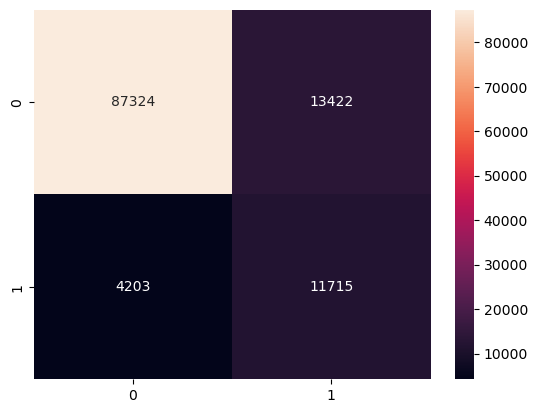

In [100]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [101]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 5).mean()

0.839160604370778

After testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Gaussian Naive Bayes model 2 has slightly improved with an Accuracy between 83% - 85% in regards to if a person died or not due Covid-19.

As show above the changing the value in target and dropping noise in data did not improve the accuracy and precision significantly. 
### Performing pca and scaling to improve the accuracy
Pricipal component analysis is a tool that can be used to reduce the dimemtionality in a dataset, in an effort to improve the perfomance of our models, we will be using pca to reduce noise in the covid_19 data set. This ensures that only relevant variance are fed into the model. 
### Scaling rationale
We would also be scalling the dependent variable in covid_19 dataset in an effort to improve the accuracy our models. Scalling is a feuture enginerring tool that can help to ensure that numerical data are all on thesame scale. 

In [102]:
df3 = df2.drop(['DIED'], axis =1, inplace=False)

In [103]:
df3.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE_Cat
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,3
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,3
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3


In [104]:
df3.shape

(388878, 17)

## Scalling
To choose the right scaling method to use, we need the statistical summary of the data to see the ditribution. 

In [105]:
df3.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE_Cat
count,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000,388878.000000
mean,1.624731,8.685523,1.533828,1.282271,1.781970,1.989647,1.841441,1.984370,1.973382,1.987837,1.804026,1.974411,1.978353,1.814186,1.979703,1.926602,1.960383
std,0.484193,3.769100,0.498855,0.450105,0.412908,0.101221,0.365265,0.124038,0.160963,0.109614,0.396949,0.157906,0.145528,0.388957,0.141014,0.260790,0.664707
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000


MinMax scaller is good for skwed data because it scales the observation to be between 0 and 1 

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
covid_scaled = scaler.fit_transform(df3)

## PCA

In [107]:
# Import pca library
from sklearn.decomposition import PCA
# Get the pattern in the data 
pca= PCA()
covid =pca.fit(covid_scaled)

In [108]:
print(covid.explained_variance_) 

[0.40591645 0.24902431 0.21189679 0.16541041 0.13803479 0.09689304
 0.08930466 0.06651285 0.05693384 0.03778583 0.02615846 0.02493265
 0.02079017 0.01827359 0.01464147 0.01141756 0.01004531]


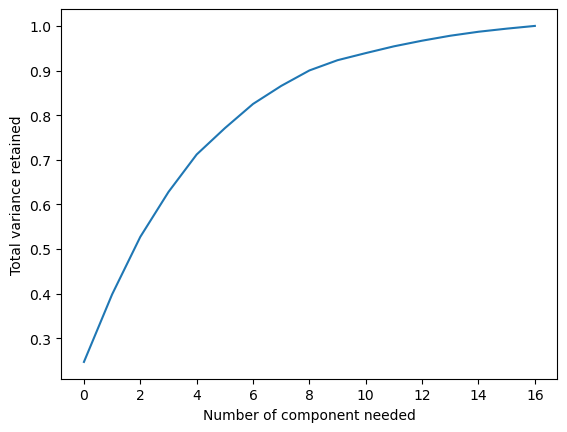

In [109]:
plt.plot(np.cumsum(covid.explained_variance_ratio_))
plt.xlabel ("Number of component needed")
plt.ylabel ("Total variance retained")
plt.show()


As shown above, the pca plot shows that 16 components in the covid datasert is need to preserve 100% variance in the data. We will apply this component and train our model with scaled and pca trained variance. 

In [110]:
#Sepcifying i need just 16 features
pca= PCA(16)
covid_t = pca.fit_transform(covid_scaled)
print("original shape:   ", covid_scaled.shape) 
print("transformed shape:", covid_t.shape)
# now fetures have been transformed to 25 features

original shape:    (388878, 17)
transformed shape: (388878, 16)


In [111]:
target= df2['DIED']
target.info

<bound method Series.info of 0          1
2          1
4          1
5          0
6          0
          ..
1047933    0
1047934    0
1047935    0
1047936    0
1047937    0
Name: DIED, Length: 388878, dtype: int64>

In [112]:
X= covid_t
y= target

## Random forest 3

In [113]:
X.shape, y.shape

((388878, 16), (388878,))

In [114]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.20, random_state=40)
X_train.shape, X_test.shape,y_train.shape,y_test.shape


((311102, 16), (77776, 16), (311102,), (77776,))

In [115]:
rfc= RandomForestClassifier(n_estimators= 50, max_depth=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

## Model Evaluation

In [116]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.8777643488994035
Precision: 0.6708074534161491
Accuracy: 0.88
Precision: 0.67


              precision    recall  f1-score   support

           0       0.89      0.98      0.93     67114
           1       0.67      0.21      0.32     10662

    accuracy                           0.88     77776
   macro avg       0.78      0.60      0.63     77776
weighted avg       0.86      0.88      0.85     77776



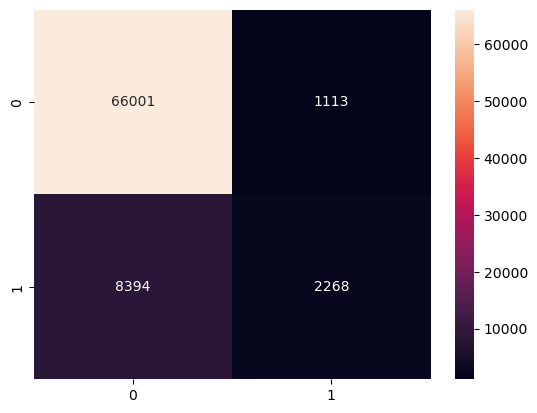

In [117]:
y_predict = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [118]:
# Calculate the score using cross validation method
cross_val_score(rfc, X, y, scoring = 'accuracy', cv = 5).mean()

0.861180124894107

## GNB 3 

In [119]:
classi = GaussianNB()
classi.fit(X_train, y_train)

GaussianNB()

In [120]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:15,:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

## Model Evaluation

In [121]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.8385105945278749
Precision: 0.3696786597088712
Accuracy: 0.84
Precision: 0.37


              precision    recall  f1-score   support

           0       0.89      0.93      0.91     67114
           1       0.37      0.25      0.30     10662

    accuracy                           0.84     77776
   macro avg       0.63      0.59      0.60     77776
weighted avg       0.82      0.84      0.83     77776



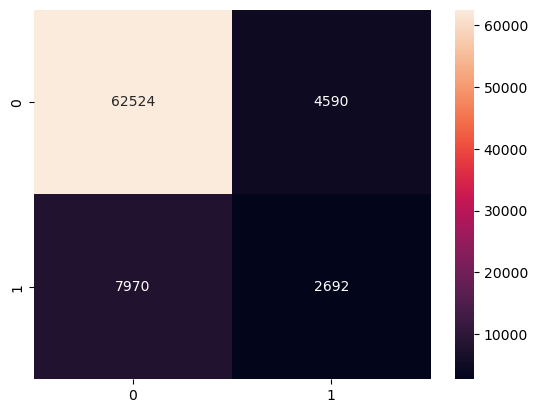

In [122]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [123]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 5).mean()

0.8312839374667178

As shown our model accuracy and precision is not improving. After MinMax scalling, pca precision and accuracy stayed the same.

## Balancing dataset

In [124]:
y.value_counts()

0    335518
1     53360
Name: DIED, dtype: int64

In [125]:
# Now we can see that the class(y) is imbalance
y_train.value_counts()

0    268404
1     42698
Name: DIED, dtype: int64

As shown above there is higher imbalance in the target variable. The survied patient are 282158 more than the patient that died, thus might be why our model has a good accuracy percent but very low precision. To improve performance, we will balance the data set hence hopefully improving the model performance.

In [126]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

In [127]:
y= target
X= covid_t

In [128]:
X.shape

(388878, 16)

In [129]:
y.shape

(388878,)

## Random Forest 4

In [161]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 11)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [162]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((536908, 16), (134128, 16), (536908,), (134128,))

In [163]:
rfc= RandomForestClassifier(n_estimators= 50, max_depth=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

## Model Evaluation

In [164]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.8782953596564476
Precision: 0.8334472425214237
Accuracy: 0.88
Precision: 0.83


n_estimators = 50


1. Test_size = 40%
Accuracy: 0.8789161065582922
Precision: 0.8310895184578163
Accuracy: 0.88
Precision: 0.83
2. Test_size = 30%
Accuracy: 0.8775122324007265
Precision: 0.832050073329143
Accuracy: 0.88
Precision: 0.83
3. Test_size = 20%
Accuracy: 0.8782953596564476
Precision: 0.8334472425214237
Accuracy: 0.88
Precision: 0.83
4. Test_size = 10%
Accuracy: 0.8773477858401266
Precision: 0.8345245658619229
Accuracy: 0.88
Precision: 0.83

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     67064
           1       0.83      0.95      0.89     67064

    accuracy                           0.88    134128
   macro avg       0.89      0.88      0.88    134128
weighted avg       0.89      0.88      0.88    134128



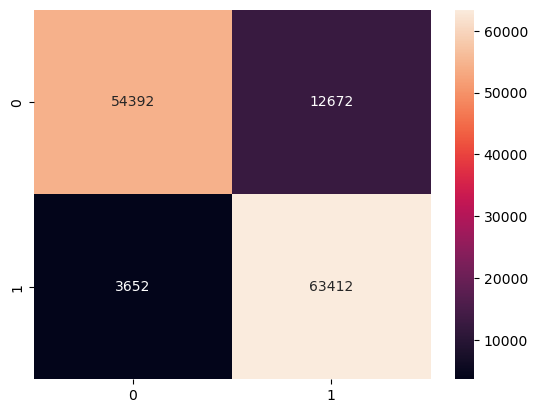

In [165]:
y_predict = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [166]:
# Calculate the score using cross validation method
cross_val_score(rfc, X, y, scoring = 'accuracy', cv = 5).mean()

0.8609024069716718

1. Test_size = 40%
 Accuracy = 0.88, F1 score = 0.87 and 0.89
2. Test_size = 30%
 Accuracy = 0.88, F1 score = 0.87 and 0.89
3. Test_size = 20%
 Accuracy = 0.88, F1 score = 0.87 and 0.89
4. Test_size = 10%
 Accuracy = 0.88, F1 score = 0.87 and 0.88

After balancing our data and testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Random Forest model 4 has an Accuracy between 86% - 88% with a significant improvement on pur Recall score that is the proportion of actual positives correctly identified in regards to if a person died or not due Covid-19.

## GNB 4

In [136]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 11)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [137]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:15,:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

## Model Evaluation

In [138]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.5875571920561351
Precision: 0.7785601515629934
Accuracy: 0.59
Precision: 0.78


              precision    recall  f1-score   support

           0       0.55      0.93      0.69    100757
           1       0.78      0.24      0.37    100757

    accuracy                           0.59    201514
   macro avg       0.67      0.59      0.53    201514
weighted avg       0.67      0.59      0.53    201514



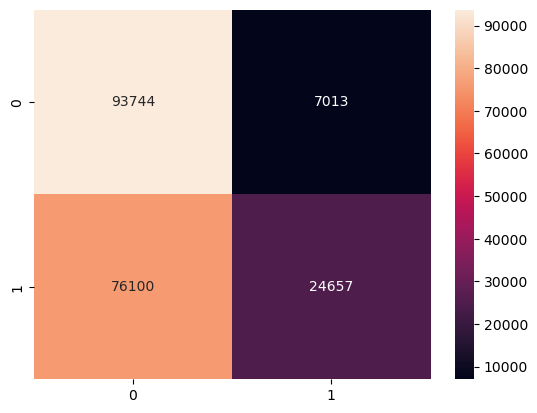

In [139]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [140]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 5).mean()

0.8312839374667178

As shown above, our GNB model 4 is not performing well after balancing our data, this could be due a lack of data to be able to correctly identify if a person died or not from Covid-19.

## Conlusions
Succeeding our analysis, we can observe that a Random Machine model will have a better performance for this case in particular and with the data that we have available, this model is consistently predicting if a person died or not from Covid-19 with an Accuracy of 86% - 88% with a proportion of actual positives correctly identified (Recall) of 81% (survived) and 95% (died).

The previously mentioned scores were gathered using the following methods:
1. Metrics from Sklearn to evaluate the Accuracy and Precision.
2. Classification report from Sklearn.metrics to evaluate Precision, Recall, F1-score and Accuracy.
3. Cross validation score from Sklearn.model_selection to evaluate the Accuracy dividing the data into multiple subsets to obtain a reliable metric and compare it with our previous ones.
